In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ssp = pd.read_csv('SSP_IAM_V2_201811.csv')

In [4]:
my_dict = { 
    'Expenditure GDP PPPs (in mil. 2017US$)' : 'sum',
    'Output-side GDP PPPs (in mil. 2017US$)' : 'sum',
    'Number of persons engaged (in millions)' : 'sum',
    'Capital stock at current PPPs (in mil. 2017US$)' : 'sum',
    'TFP level at current PPPs (USA=1)' : 'mean',
    'Population (in millions)' : 'sum',
    'Average depreciation rate of the capital stock' : 'mean',
    'Capital stock at constant 2017 national prices (in mil. 2017US$)' : 'sum',
    'Real internal rate of return' : 'mean', 
    'co2 (mtCO2)' : 'sum',
    'Annual CO₂ emissions per GDP (kg per international-$)' : 'mean'             
    }

In [5]:
## GROUPING

ssp_groups = pd.read_csv('groups.csv', delimiter=';')
ssp_groups.COUNTRY = ssp_groups.COUNTRY.str.lower()
ssp_groups.rename(columns={'COUNTRY' : 'Name'}, inplace=True)

region_groups = pd.read_csv('all.csv')
region_groups = region_groups.drop(columns=['country-code','iso_3166-2','alpha-2', 'intermediate-region-code', 'region-code', 'sub-region-code']).rename(columns={'name' : 'Name' , 'alpha-3' : 'Code'})
region_groups.Name = region_groups.Name.str.lower()

ar5 = pd.read_csv('ar5.csv')
ar5 = ar5.rename(columns={'Region' : 'AR5'})
ar32 = pd.read_csv('ar32.csv').drop(columns='Name')
ar32 = ar32.rename(columns={'Region' : 'AR32'})

ar = pd.merge(ar5, ar32, on='Code', how='left').drop(columns='Name')

groups = pd.merge(ssp_groups, region_groups, how='left', on='Name')
groups = pd.merge(groups, ar, how='left', on='Code')

groups

,Name,Regional Definition,AIM/CGE,GCAM,IMAGE,MESSAGE-GLOBIOM,ReMIND-MAGPIE,WITCH-GLOBIOM,Code,region,sub-region,intermediate-region,AR5,AR32
0,afganistan,ASIA,ASIA,ASIA,ASIA,ASIA,ASIA,ASIA,NaN,NaN,NaN,NaN,NaN,NaN
1,albania,OECD,OECD,OECD,OECD,OECD,OECD,REF,ALB,Europe,Southern Europe,NaN,EIT,EEU
2,algeria,MAF,MAF,MAF,MAF,MAF,MAF,MAF,DZA,Africa,Northern Africa,NaN,MAF,NAF
3,angola,MAF,MAF,MAF,MAF,MAF,MAF,MAF,AGO,Africa,Sub-Saharan Africa,Middle Africa,MAF,SSA-M
4,antigua and barbuda,LAM,LAM,LAM,LAM,LAM,LAM,LAM,ATG,Americas,Latin America and the Caribbean,Caribbean,LAM,LAM-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,yemen,MAF,MAF,MAF,MAF,MAF,MAF,MAF,YEM,Asia,Western Asia,NaN,MAF,MEA-M
199,zambia,MAF,MAF,MAF,MAF,MAF,MAF,MAF,ZMB,Africa,Sub-Saharan Africa,Eastern Africa,MAF,SSA-L
200,zimbabwe,MAF,MAF,MAF,MAF,MAF,MAF,MAF,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,MAF,SSA-L
201,"palestine, state of",MAF,NaN,NaN,MAF,NaN,NaN,NaN,PSE,Asia,Western Asia,NaN,MAF,MEA-M


In [6]:
## Economics Data
pwt10 = pd.read_csv('pwt10.csv', delimiter=';')
pwt10.rename(columns={  'countrycode' : 'Code',
                        'country' : 'Name',
                        'year' : 'Year',
                        'cgdpe' : 'Expenditure GDP PPPs (in mil. 2017US$)',
                        'cgdpo' : 'Output-side GDP PPPs (in mil. 2017US$)',
                        'emp' : 'Number of persons engaged (in millions)',
                        'cn' : 'Capital stock at current PPPs (in mil. 2017US$)',
                        'ctfp' : 'TFP level at current PPPs (USA=1)',
                        'pop' : 'Population (in millions)',
                        'delta' : 'Average depreciation rate of the capital stock',
                        'rnna' : 'Capital stock at constant 2017 national prices (in mil. 2017US$)',
                        'irr' : 'Real internal rate of return'
                        }, inplace=True)
pwt10.Name = pwt10.Name.str.lower()


merged = pd.merge(pwt10, groups, how='left', on=['Code', 'Name'])

In [7]:
## CO2
co2 = pd.read_csv('owid-co2-data.csv')
co2.rename(columns={'country' : 'Name', 'year' : 'Year', 'iso_code' : 'Code', 'co2' : 'co2 (mtCO2)' }, inplace=True)
co2.drop(columns=['population', 'gdp'], inplace=True)
co2.Name = co2.Name.str.lower()

co2_intensity = pd.read_csv('co2-intensity.csv').drop(columns=['Entity'])
co2_intensity = co2_intensity.loc[co2_intensity['Year'] == 2018].drop(columns='Year')
co2_intensity['(tCO2/PPP-$)'] = co2_intensity['(kgCO2/PPP-$)'] * 1e3
co2_merged = pd.merge(co2, co2_intensity, on=['Code'], how='left')


In [8]:
merged = pd.merge(merged, co2_merged, how='left', on=['Code', 'Name', 'Year'])

In [9]:
my_dict = { 
    'Expenditure GDP PPPs (in mil. 2017US$)' : 'sum',
    'Output-side GDP PPPs (in mil. 2017US$)' : 'sum',
    'Number of persons engaged (in millions)' : 'sum',
    'Capital stock at current PPPs (in mil. 2017US$)' : 'sum',
    'TFP level at current PPPs (USA=1)' : 'mean',
    'Population (in millions)' : 'sum',
    'Average depreciation rate of the capital stock' : 'mean',
    'Capital stock at constant 2017 national prices (in mil. 2017US$)' : 'sum',
    'Real internal rate of return' : 'mean', 
    'co2 (mtCO2)' : 'sum',
    '(tCO2/PPP-$)' : 'mean'             
    }

players = merged.loc[merged['Year'] == 2019].groupby('sub-region').agg(my_dict)
players

,Expenditure GDP PPPs (in mil. 2017US$),Output-side GDP PPPs (in mil. 2017US$),Number of persons engaged (in millions),Capital stock at current PPPs (in mil. 2017US$),TFP level at current PPPs (USA=1),Population (in millions),Average depreciation rate of the capital stock,Capital stock at constant 2017 national prices (in mil. 2017US$),Real internal rate of return,co2 (mtCO2),(tCO2/PPP-$)
sub-region,,,,,,,,,,,
Australia and New Zealand,1477568.91,1554384.63,15.37,6.473534e+06,0.850000,29.98,0.035000,6.489689e+06,0.070000,453.478,272.442535
Central Asia,604855.21,645854.43,23.21,2.440770e+06,0.360000,54.66,0.040000,2.455376e+06,0.083333,212.422,368.424200
Eastern Asia,24976310.35,25188029.90,870.17,1.235124e+08,0.460000,1563.87,0.046667,1.236931e+08,0.056667,11894.267,632.149970
Eastern Europe,7432246.46,7263546.57,127.92,3.195635e+07,0.671429,278.70,0.047500,3.185565e+07,0.096250,804.882,312.502503
Latin America and the Caribbean,9250066.90,9164189.54,262.40,3.640553e+07,0.613889,591.80,0.040385,3.649057e+07,0.123333,1583.569,235.158745
Melanesia,12212.17,12362.83,0.31,2.675904e+04,0.810000,0.89,0.080000,2.698647e+04,0.280000,1.359,NaN
Northern Africa,2164177.29,2317648.68,63.59,5.985593e+06,0.807500,234.41,0.050000,6.013703e+06,0.160000,555.909,233.613557
Northern America,1846887.90,1865258.01,19.33,8.437288e+06,0.850000,37.47,0.045000,8.473242e+06,0.130000,585.297,350.047100
Northern Europe,2204825.87,2184103.89,18.89,9.597576e+06,0.841111,37.94,0.046667,9.609978e+06,0.084444,231.927,194.273159


$$ Y(t) = \left[ \alpha\right]$$

In [11]:
def capital_dynamic(t, capital, depreciation_rate, investment):
    capital = np.ones(t)*capital
    for idx in range(1,t):
        capital[idx] = (1- depreciation_rate ) * capital[idx -1] + investment
    return capital

def population_dynamic(t, pop, delta):
    population = np.zeros(t)
    g = 1 / (1+delta)
    for idx in range(t):
        population[idx] = pop
        pop = pop * (1 + g)
        g = g/ (1 + delta)
    return population

def tfp_dynamic(t, tfp, delta):
    tfp_ = np.zeros(t)
    g = 1 / (1+delta)
    for idx in range(t):
        tfp_[idx] = tfp
        tfp = tfp * (1 + g)
        g = g/ (1 + delta)
    return tfp_


def GDP_dynamic(emissions, capital, depreciation_rate, investment, population, tfp, emission_intensity, sigma, alpha):
    rho = (sigma-1)/sigma
    print(rho)
    t = len(emissions)
    GDP = np.zeros(t)
    for idx in range(t):
        GDP[idx] = ((tfp[idx] * capital**alpha * population[idx] **(1-alpha) )**rho + ( emission_intensity * emissions[idx])**rho)**(1/rho) 
        capital = (1- depreciation_rate ) * capital + GDP[idx]
        # print(tfp[idx])
        # print(capital**alpha* population[idx] **(1-alpha) )
        print(tfp[idx] * capital**alpha * population[idx] **(1-alpha))
        print( emission_intensity * emissions[idx])


    return GDP

'Australia and New Zealand'

In [1]:
class economic:

    def __init__(self) -> None:


    # Global 

        self.elasticity = elasticity

        #: global frontier growth rate
        self.g = g       


    # Population (L)

        self.population = population
        self.population_employment = population_employment

        # Human Capital 

        self.h = h

        # Unemployement

        self.unr = unr # rate
        self.gamma_unr = gamma_unr
        self.unr_frontier = unr_frontier


    # Total Factor Productivity (TFP)

        self.tfp = tfp 
        self.tfp_frontiere = tfp_frontiere

        # TFP Frontier

        self.e_0 = e_0

        # Openness

        self.rho_0 = rho_0
        self.rho_open = rho_open
        self.open = openness
        self.open_world = open_world

        # Fixed Effect (fe)
        
        self.fe = fe
        self.gamma_fe = gamma_fe
        self.fe_frontier = fe_frontier

        # Product market regulation (PMR)

        self.pmr = pmr
        self.global_pmr = global_pmr
        self.a_pmr = a_pmr 


    # Capital (K)

        self.capital = capital
        self.capital_depreciation = capital_depreciation

        # Investment

        self.investment = investment
        self.gamma_i = gamma_i
        self.y_growth = y_growth  # a way to get reed of the Y_t/ Y_{t-1} in the investment making it exogeneous

        # Return to capital (MCP)

        self.gamma_mpc = gamma_mpc
        self.mpc_frontier = mpc_frontier

        # Long-run Capital Output (k_y)

        self.alpha_k_y = alpha_k_y

        # Long-run target

        self.delta = delta



    # Energy and Emission (E)

        self.emission_intensity = emission_intensity
        self.mix = mix


        

    def gdp(self, previous_capital : np.ndarray, population : np.ndarray, population_employement : np.ndarray, tfp : np.ndarray):
        return tfp * previous_capital**self.elasticity * (population_employement * population)**(1 - self.elasticity)
    

# Labor (L)

    def labor_dynamic(self, unr : np.ndarray, aggregated_pop : np.ndarray):
        return (1-unr) *  aggregated_pop

    def unr_dynamic(self, initial_unr : float,  t : int):
        unr = []
        u = initial_unr
        for _ in range(t):
            unr.append(u)
            u = self.gamma_unr * u + (1  - self.gamma_unr) * self.unr_frontier

    def gloabal_labor(self, inital_unr : float, aggregated_pop : np.ndarray, t):
        unr = self.unr_dynamic(inital_unr, t)
        labor = self.labor_dynamic(unr, aggregated_pop)
        return labor
    

# TFP

    def fe_dynamic(self, initial_fe : float, t : int):
        fe = []
        f = initial_fe
        for _ in range(t):
            fe.append(f)
            f = self.gamma_fe * f + (1 - self.gamma_fe) * self.fe_frontier
        return np.array(fe)

    def rho_tfp_dynamic(self):
        # rho_tfp  = []
        # for idx in range(t):
        #     rho_tfp.append(self.rho_0 + self.rho_open[idx] * (self.open[idx] - self.open_world))/(1 + self.rho_0 +  self.rho_open[idx] * (self.open[idx] - self.open_world))
        return (self.rho_0 + self.rho_open * (self.open - self.open_world))/(1 + self.rho_0 +  self.rho_open * (self.open - self.open_world))
    
    def tfp_frontier_dynamic(self, fe : np.ndarray, t : int, t_0 : int):
        return np.exp( self.e_0 + fe + self.g * (np.arange(t) - t_0) + self.a_pmr * (self.pmr - self.global_pmr))

    def tfp_dynamic(self, initial_tfp : float, tfp_frontier : np.ndarray, rho_tfp : np.ndarray, t : int):
        tfp = []
        a = initial_tfp
        for idx in range(t):
            tfp.append(a)
            a = a * (tfp_frontier/ a) ** rho_tfp[idx]
        return np.array(tfp)
    
    def global_tfp(self, intial_tfp : float, intial_fe : float, t : int, t_0 : int):
        fe = self.fe_dynamic(intial_fe, t)
        rho_tfp = self.rho_tfp_dynamic(t)
        tfp_frontier = self.tfp_frontier_dynamic(fe, t, t_0) 
        tfp = self.tfp_dynamic(intial_tfp, tfp_frontier, rho_tfp, t)
        return tfp

# Capital 

    def mpc_dynamic(self, initial_mpc : float, t : int): 
        mpc = []
        m = initial_mpc
        for _ in range(t):
            mpc.append(m)
            m = self.gamma_mpc * m + (1 - self.gamma_mpc) * self.mpc_frontier
        return np.array(mpc)
    
    # long-run capital output

    def k_y_dynamic(self, mpc : np.ndarray):
        return self.alpha_k_y / mpc
    
    def g_y_dynamic(self, g_population : np.ndarray, g_human : np.ndarray):
        return (1 + self.g) * (1 + g_population) * (1 + g_human) -1


    def i_y_dynamic(self, k_y : np.ndarray, g_gdp : np.ndarray):
        return (g_gdp + self.delta ) * k_y
    
    
    def i_dynamic(self, initial_investment : float, i_y : np.ndarray, y_growth : np.ndarray, t : int):
        investment = []
        i = initial_investment
        for idx in range(t):
            investment.append(i)
            i = self.gamma_i * y_growth * i + (1 - self.gamma_i) * i_y[idx]
        return np.array(investment)


    def capital_dynamic(self, initial_capital : np.ndarray, t : int):
        capital = []
        k = initial_capital
        for idx in range(t):
            k = (1 - self.capital_depreciation) *  k + self.investment[idx]
            capital.append(k)
        return capital
    

        
        

NameError: name 'np' is not defined

In [113]:
energy_post_2000_port = energy_post_2000.filter(regex='share_energy').drop(columns=['electricity_share_energy', 'fossil_share_energy', 'low_carbon_share_energy', 'other_renewables_share_energy', 'renewables_share_energy'])

In [114]:
energy_post_2000_port

,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_energy,oil_share_energy,solar_share_energy,wind_share_energy
country,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,23.083583,26.152667,6.667917,0.678500,42.201417,0.315083,0.537167
Africa (BP),0.013583,23.083583,26.152667,6.667917,0.678500,42.201417,0.315083,0.537167
Africa (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (Shift),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,0.596500,28.580417,23.174250,6.876417,4.449917,32.879750,0.657583,1.666583
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
shared_part = energy_post_2000_port.groupby('country').mean()

In [116]:
sum = shared_part.sum(axis=1).reset_index()

In [117]:
sum.loc[sum[0] >1]['country'].unique()

array(['Africa', 'Africa (BP)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (BP)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (BP)', 'Canada', 'Central America (BP)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (BP)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (BP)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (BP)',
       'Middle East (BP)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (BP)', 'North America', 'North America (BP)',
       'North Macedonia', 'Norway', 'OECD (BP)', 'Oceania', 'Oman',
     

In [139]:
energy = pd.read_csv('owid-energy-data.csv')
primary_consumption = energy.filter(['country', 'year','primary_energy_consumption']).loc[energy['year'] >= 2010].groupby('country').mean()
mix = pd.read_csv('mix.csv', delimiter=';')
convert = pd.read_csv('convert.csv')
conv = convert.groupby('Type (Per kWh)').mean().reset_index()
conv.filter(['Type (Per kWh)','Climate change total (kg CO2-Eq) '])
conv = conv.set_index('Type (Per kWh)').reindex(['Oil', 'Natural gas', 'Hard coal', 'Nuclear', 'Hydro'])
conv.loc['Renew- ables'] = 0.0166915
conv_vect = conv['Climate change total (kg CO2-Eq) '].to_numpy()
mix_matrix = mix.filter(['Oil',	"Natural Gas",	'Coal',	'Nuclear energy',	'Hydro electric', 'Renew- ables']).to_numpy(dtype=float)
intensity = mix_matrix @ conv_vect
carbon_intensity = pd.DataFrame({'Entity' : mix['Primary Energy: part'], 'Intensity' : intensity})
primary_consumption = primary_consumption.reset_index()
primary_consumption.rename(columns={'country' : 'Entity'}, inplace=True)
merge = pd.merge( primary_consumption,carbon_intensity, on='Entity', how='left')
merge.dropna()['Entity'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Ecuador', 'Egypt', 'European Union (27)',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=object)

In [119]:
merge.Entity.unique()

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Africa (Shift)', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Asia', 'Asia & Oceania (EIA)', 'Asia (Ember)',
       'Asia Pacific (BP)', 'Asia and Oceania (Shift)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (BP)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica

In [152]:
energy = pd.read_csv('owid-energy-data.csv')
primary_consumption = energy.filter(['country', 'year','primary_energy_consumption']).loc[energy['year'] >= 2015].groupby('country').mean()
primary_consumption.primary_energy_consumption = primary_consumption.primary_energy_consumption * 1e9 # Conversion from TWh to kWh
primary_consumption = primary_consumption.reset_index()
primary_consumption.rename(columns={'country' : 'Entity'}, inplace=True)

convert = pd.read_csv('convert.csv')
conv = convert.groupby('Type (Per kWh)').mean().reset_index()
conv.filter(['Type (Per kWh)','Climate change total (kg CO2-Eq) '])
conv = conv.set_index('Type (Per kWh)').reindex(['Oil', 'Natural gas', 'Hard coal', 'Nuclear', 'Hydro'])
conv.loc['Renew- ables'] = 0.0166915
conv_vect = conv['Climate change total (kg CO2-Eq) '].to_numpy() * 1e-3 # Conversion en tons

mix = pd.read_csv('mix.csv', delimiter=';')
mix_matrix = mix.filter(['Oil',	"Natural Gas",	'Coal',	'Nuclear energy',	'Hydro electric', 'Renew- ables']).to_numpy(dtype=float)

intensity = mix_matrix @ conv_vect
carbon_intensity = pd.DataFrame({'Entity' : mix['Primary Energy: part'], 'Intensity' : intensity})


merge = pd.merge( primary_consumption,carbon_intensity, on='Entity', how='left')
merge.dropna()['Entity'].unique()

merge_no_na = merge.dropna()
new = merge_no_na.filter(['Entity', 'primary_energy_consumption', 'Intensity']).reset_index(drop=True)
# new.primary_energy_consumption = new.primary_energy_consumption * 2.778e+11 # conversion en kWh
new['CO2_estimated'] = new.primary_energy_consumption * new.Intensity # CO2 estimer avec la méthode

In [153]:
co2 = pd.read_csv('data_CO2.csv')
co2 = co2.loc[co2["Year"] == 2020].drop(columns='Unnamed: 0')

In [154]:
co2.CO2 = co2.CO2 * 1.0e3

In [155]:
new['Entity'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Ecuador', 'Egypt', 'European Union (27)',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=object)

In [156]:
new.loc[new['Entity'] == 'China']

,Entity,primary_energy_consumption,Intensity,CO2_estimated
11,China,3.880201e+13,0.000739,2.865833e+10


In [157]:
neww = pd.merge(new, co2, on='Entity', how='left')

In [146]:
neww['coefficient'] = neww.CO2_estimated / neww.CO2

In [158]:
neww['CO2_estimated'].sum()*1e-12

0.10528853364135851

In [130]:
neww.primary_energy_consumption.sum()

4.58924663814e+16

In [131]:
(neww.primary_energy_consumption - neww.CO2 *neww.coefficient /neww.Intensity) /neww.primary_energy_consumption

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
          ...     
59   -1.147184e-16
60    1.463701e-16
61    0.000000e+00
62             NaN
63    0.000000e+00
Length: 64, dtype: float64

In [141]:
from models.game_theory_model.damage_function import *

ModuleNotFoundError: No module named 'models'

In [184]:
def capital_dynamic(t, capital, depreciation_rate, investment):
    capital = np.ones(t)*capital
    for idx in range(1,t):
        capital[idx] = (1- depreciation_rate ) * capital[idx -1] + investment
    return capital

def population_dynamic(t, pop, delta):
    population = np.zeros(t)
    g = 1 / (1+delta)
    for idx in range(t):
        population[idx] = pop
        pop = pop * (1 + g)
        g = g/ (1 + delta)
    return population

def tfp_dynamic(t, tfp, delta):
    tfp_ = np.zeros(t)
    g = 1 / (1+delta)
    for idx in range(t):
        tfp_[idx] = tfp
        tfp = tfp * (1 + g)
        g = g/ (1 + delta)
    return tfp_


def GDP_dynamic(emissions, capital, depreciation_rate, investment, population, tfp, emission_intensity, sigma, alpha):
    rho = (sigma-1)/sigma
    print(rho)
    t = len(emissions)
    GDP = np.zeros(t)
    for idx in range(t):
        GDP[idx] = ((tfp[idx] * capital**alpha * population[idx] **(1-alpha) )**rho + ( emission_intensity * emissions[idx])**rho)**(1/rho) 
        capital = (1- depreciation_rate ) * capital + GDP[idx]
        # print(tfp[idx])
        # print(capital**alpha* population[idx] **(1-alpha) )
        print(tfp[idx] * capital**alpha * population[idx] **(1-alpha))
        print( emission_intensity * emissions[idx])


    return GDP



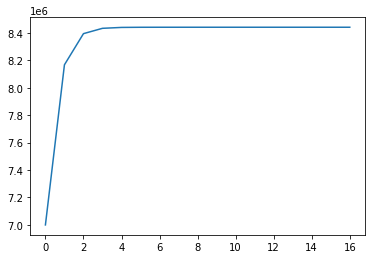

In [185]:
plt.plot(population_dynamic(17, 7e6, 5))

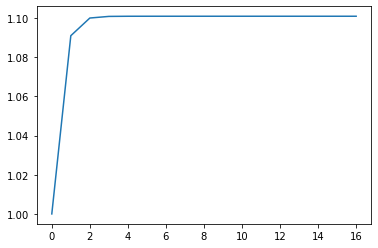

In [186]:
plt.plot(tfp_dynamic(17, 1, 10))

-0.041666666666666706
182292300.15981066
10880000000.032
255785153.27550787
10240000000.032
284203402.98949164
9600000000.032
300207913.13788545
8960000000.032
311473124.3361116
8320000000.032
320024970.0541178
7680000000.032
326664227.02115035
7040000000.032
331825247.6041946
6400000000.032
335782463.91864884
5760000000.032
338719626.2249191
5120000000.032001
340760452.80512184
4480000000.032001
341983855.7612263
3840000000.032
342430471.9541033
3200000000.032
342101908.79989
2560000000.032
340949904.3664157
1920000000.032
338842606.36648697
1280000000.032
335445873.9022203
640000000.032
[65.8396515  83.85853343 88.65303158 89.61294246 88.97552022 87.3932336
 85.12685061 82.30250631 78.98263667 75.19059934 70.91928734 66.13123316
 60.75072677 54.6430651  47.56411486 39.01866789 27.69837999]


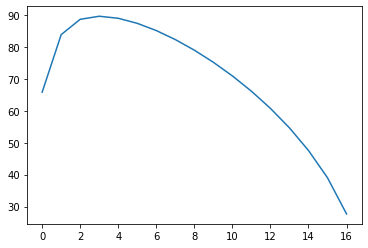

In [189]:
T = 17
CO2 = np.arange(17,0,-1)*20*1e8+0.1

CAPITAL = 20
DEPRECIATION_RATE = 0.1
INVESTMENT = 0.2
TFP = 1.15
TFP_RATE = 1
ALPHA = 0.3
SIGMA = 0.96
POPULATION = population_dynamic(17, 7e9, 5) # population in millions
# ENERGY_PRODUCTIVITY = 0.3  # kWh/$
# ENERGY_INENSITY = 1/0.0006895527962802458
EMISSION_INTENSITY = 0.32
GDP = GDP_dynamic(emissions=CO2, capital=CAPITAL, depreciation_rate=DEPRECIATION_RATE, investment=INVESTMENT, population=POPULATION, tfp=tfp_dynamic(17, 1, 10),emission_intensity=EMISSION_INTENSITY,alpha=ALPHA,sigma=SIGMA)
print(GDP)
plt.plot(GDP)
plt.show()

In [132]:
CO2

array([850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250,
       200, 150, 100])

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_2328\2501049047.py:1: RuntimeWarning: divide by zero encountered in power
  plt.plot(np.linspace(0,1)**-6)


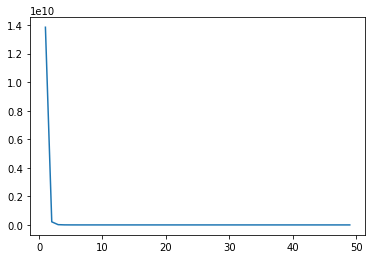

In [89]:
plt.plot(np.linspace(0,1)**-6)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
co2 = pd.read_csv('owid-co2-data.csv')
energy = pd.read_csv('owid-energy-data.csv')
energy_source = pd.read_csv('primary-energy-source-bar.csv')
convert = pd.read_csv('convert.csv')

In [20]:
co2.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [21]:
res = energy_source.loc[energy_source['Year'] >=2015].set_index(['Code','Entity', 'Year'])
res = res.div(res.sum(axis=1), axis=0).groupby('Entity').mean()


In [24]:
res.sum(axis=1)

Entity
Africa                 1.0
Africa (BP)            1.0
Algeria                1.0
Argentina              1.0
Asia                   1.0
                      ... 
Uzbekistan             1.0
Venezuela              1.0
Vietnam                1.0
Western Africa (BP)    1.0
World                  1.0
Length: 103, dtype: float64

In [6]:
energy.loc[energy['year'] ==2015]

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
115,Afghanistan,2015,AFG,3.375350e+07,6.278339e+10,NaN,NaN,NaN,NaN,0.000,...,2.542,NaN,NaN,NaN,NaN,0.000,0.000,NaN,0.000,NaN
237,Africa,2015,NaN,1.201108e+09,NaN,NaN,NaN,NaN,NaN,5.137,...,0.420,0.174,76.098,10.288,23.996,7.127,8.560,19.978,1.125,0.475
294,Africa (BP),2015,NaN,NaN,NaN,25.691,0.146,NaN,0.714,NaN,...,0.412,0.174,76.098,10.288,23.996,NaN,8.911,NaN,1.127,0.475
316,Africa (Ember),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420,NaN,NaN,NaN,NaN,NaN,8.560,NaN,1.125,NaN
438,Africa (Shift),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,Western Sahara,2015,ESH,4.918370e+05,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN
21476,World,2015,NaN,7.426597e+09,NaN,4.178,36.301,121.872,905.096,64.650,...,1.077,0.451,17.778,326.559,2238.786,111.544,828.390,301.455,3.502,1.470
21518,Yemen,2015,YEM,2.851655e+07,7.990404e+10,NaN,NaN,NaN,NaN,0.000,...,2.024,NaN,NaN,NaN,NaN,0.000,0.000,NaN,0.000,NaN
21732,Zambia,2015,ZMB,1.624823e+07,5.498018e+10,NaN,NaN,NaN,NaN,6.155,...,0.000,NaN,NaN,NaN,NaN,0.000,0.000,NaN,0.000,NaN


In [37]:
mix = energy.loc[energy['year'] ==2020].filter(['country','year', 'population','gdp', 'primary_energy_consumption', 'greenhouse_gas_emissions', 'coal_consumption', 'oil_consumption', 'gas_consumption', 'solar_consumption', 'nuclear_consumption', 'wind_consumption','hydro_consumption', 'biofuel_consumption']).groupby('country').mean().reset_index()
mix = mix.drop(columns=['year']).set_index(['country', 'population','gdp', 'primary_energy_consumption']).fillna(0)
mix = mix.div(mix.sum(axis=1), axis=0).reset_index()
mix.primary_energy_consumption = mix.primary_energy_consumption * 1e9

In [38]:
res

,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh
Entity,,,,,,,,
Africa,0.220602,0.412638,0.279444,0.006236,0.066648,0.007920,0.005048,0.001464
Africa (BP),0.220602,0.412638,0.279444,0.006236,0.066648,0.007920,0.005048,0.001464
Algeria,0.005253,0.349168,0.643248,0.000000,0.000351,0.000056,0.001923,0.000000
Argentina,0.013687,0.370680,0.497937,0.022590,0.078933,0.012542,0.001848,0.001783
Asia,0.418850,0.296275,0.179122,0.017899,0.059891,0.015105,0.009992,0.002865
...,...,...,...,...,...,...,...,...
Uzbekistan,0.038304,0.088205,0.842274,NaN,0.031149,0.000011,0.000056,0.000000
Venezuela,0.000960,0.333767,0.428303,0.000000,0.236598,0.000335,0.000013,0.000023
Vietnam,0.422213,0.285647,0.091602,0.000000,0.185458,0.001789,0.013191,0.000100


In [39]:
convert.loc[convert['Type']== 'coal']['gCO2/kWh'].to_numpy()

array([863.])

In [40]:
conv =  convert['gCO2/kWh'].to_numpy()

In [41]:
conv[0]

863.0

In [42]:
mix['energy_intensity'] = mix.coal_consumption * conv[0] + mix.oil_consumption * conv[1] + mix.gas_consumption * conv[2] + mix.nuclear_consumption * conv[3] + mix.solar_consumption * conv[4] + mix.wind_consumption * conv[5] + mix.hydro_consumption * conv[6]+ mix.biofuel_consumption * conv[7]

In [43]:
mix['co2_estimated'] = mix.primary_energy_consumption  * mix.energy_intensity *1e-6 * 1e-9

In [44]:
mix.loc[mix['country']=='World']

,country,population,gdp,primary_energy_consumption,greenhouse_gas_emissions,coal_consumption,oil_consumption,gas_consumption,solar_consumption,nuclear_consumption,wind_consumption,hydro_consumption,biofuel_consumption,energy_intensity,co2_estimated
249,World,7.840953e+09,NaN,1.566699e+14,0.069114,0.252865,0.291531,0.231725,0.013392,0.040911,0.025264,0.068777,0.006421,405.480553,63.526613


In [45]:
energy.loc[energy['country']=='World'].loc[energy['year'] == 2020]['fossil_fuel_consumption']

21481    128800.398
Name: fossil_fuel_consumption, dtype: float64

In [46]:
co2_2020 = co2.loc[co2['year'] == 2020]
co2_2020

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
170,Afghanistan,2020,AFG,3.897224e+07,NaN,0.061,0.002,11.682,0.600,5.416,...,NaN,0.000,0.003,0.008,0.065,NaN,NaN,NaN,NaN,NaN
442,Africa,2020,NaN,1.360677e+09,NaN,79.000,0.058,1385.889,-81.602,-5.561,...,NaN,13.330,4.038,28.454,4.623,NaN,NaN,NaN,-386.071,-27.857
614,Africa (GCP),2020,NaN,NaN,NaN,NaN,NaN,1385.877,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,Aland Islands,2020,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
958,Albania,2020,ALB,2.866850e+06,NaN,1.048,0.366,4.729,-0.219,-4.425,...,NaN,0.000,0.002,0.002,0.029,NaN,NaN,NaN,1.047,22.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45733,Western Sahara,2020,ESH,5.560600e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
46005,World,2020,NaN,7.840953e+09,NaN,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.000,100.000,100.000,100.000,100.0,NaN,NaN,0.000,0.000
46177,Yemen,2020,YEM,3.228404e+07,NaN,0.664,0.021,12.140,-0.544,-4.287,...,NaN,0.402,0.003,-0.038,0.084,NaN,NaN,NaN,NaN,NaN
46349,Zambia,2020,ZMB,1.892772e+07,NaN,0.961,0.051,7.281,-0.466,-6.022,...,NaN,0.000,0.000,1.520,0.036,NaN,NaN,NaN,0.112,1.540


In [51]:
data = pd.merge(co2_2020, mix, on=['country','population'], how='left')

In [53]:
data.co2 = data.co2 * 1e-3

In [56]:
data.co2 /data.gdp_y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
255   NaN
256   NaN
257   NaN
258   NaN
259   NaN
Length: 260, dtype: float64

In [50]:
data['population_x'].to_numpy() - data['population_y'].to_numpy()

array([ 0.,  0., nan, nan,  0.,  0.,  0., nan,  0., nan,  0.,  0.,  0.,
        0.,  0., nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
       nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0., nan,  0.,  0.,  0.,
        0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan,  0.,  0.,  0., nan,  0., nan, nan,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,
        0., nan,  0., nan, nan,  0.,  0.,  0., nan,  0., nan,  0

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('SspDb_country_data_2013-06-12.csv')

In [4]:
data.columns

Index(['MODEL', 'SCENARIO', 'REGION', 'VARIABLE', 'UNIT', '1950', '1955',
       '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000',
       '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', '2105', '2110', '2115', '2120', '2125', '2130', '2135',
       '2140', '2145', '2150'],
      dtype='object')

In [5]:
data['REGION'].unique()

array(['BHS', 'GUF', 'GRD', 'BIH', 'MYT', 'FSM', 'BLR', 'BLZ', 'BOL',
       'VIR', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA',
       'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ',
       'GRC', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT',
       'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MTQ', 'MUS', 'MWI', 'MYS',
       'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRK',
       'PRT', 'PRY',

In [6]:
data["VARIABLE"].unique()

array(['Population', 'Population|Female', 'Population|Female|Aged0-4',
       'Population|Female|Aged0-4|No Education',
       'Population|Female|Aged10-14',
       'Population|Female|Aged10-14|No Education',
       'Population|Female|Aged100+',
       'Population|Female|Aged100+|No Education',
       'Population|Female|Aged100+|Primary Education',
       'Population|Female|Aged100+|Secondary Education',
       'Population|Female|Aged100+|Tertiary Education',
       'Population|Female|Aged15-19',
       'Population|Female|Aged15-19|No Education',
       'Population|Female|Aged15-19|Primary Education',
       'Population|Female|Aged15-19|Secondary Education',
       'Population|Female|Aged15-19|Tertiary Education',
       'Population|Female|Aged20-24',
       'Population|Female|Aged20-24|No Education',
       'Population|Female|Aged20-24|Primary Education',
       'Population|Female|Aged20-24|Secondary Education',
       'Population|Female|Aged20-24|Tertiary Education',
       'Populati